In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import warnings


%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve
from sklearn.datasets import make_classification
from sklearn.calibration import calibration_curve
import pickle as pkl



datos = pd.read_csv("../data/aborto.csv", sep=';')
datos

,sexo,edad,estudios,ocupacion,aborto
0,2.0,1.0,1.0,1.0,1
1,2.0,3.0,2.0,2.0,1
2,2.0,4.0,2.0,3.0,2
3,2.0,4.0,4.0,4.0,1
4,2.0,5.0,2.0,3.0,1
...,...,...,...,...,...
298,1.0,1.0,2.0,1.0,2
299,2.0,5.0,1.0,6.0,1
300,2.0,4.0,2.0,3.0,2
301,NaN,4.0,3.0,6.0,2


Analisis y exploracion de los datos

In [2]:
datos.dtypes

sexo         float64
edad         float64
estudios     float64
ocupacion    float64
aborto         int64
dtype: object

In [3]:
datos.isnull().sum()

sexo         2
edad         1
estudios     2
ocupacion    1
aborto       0
dtype: int64

In [4]:
datos = datos.dropna()

In [5]:
datos.describe()

,sexo,edad,estudios,ocupacion,aborto
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.568562,3.234114,2.023411,4.187291,1.759197
std,0.496107,1.281793,0.849074,1.969151,0.715744
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,3.000000,1.000000
50%,2.000000,4.000000,2.000000,4.000000,2.000000
75%,2.000000,4.000000,2.000000,6.000000,2.000000
max,2.000000,5.000000,4.000000,8.000000,3.000000


In [6]:
print(datos.groupby('aborto').size())

aborto
1    121
2    129
3     49
dtype: int64


Graficos de datos

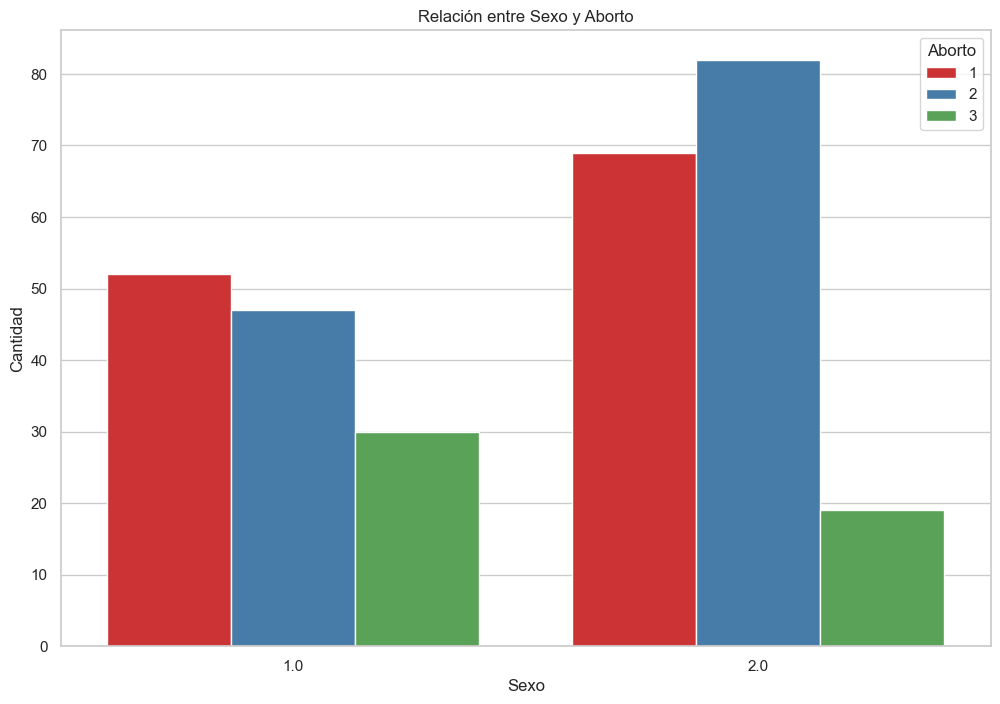

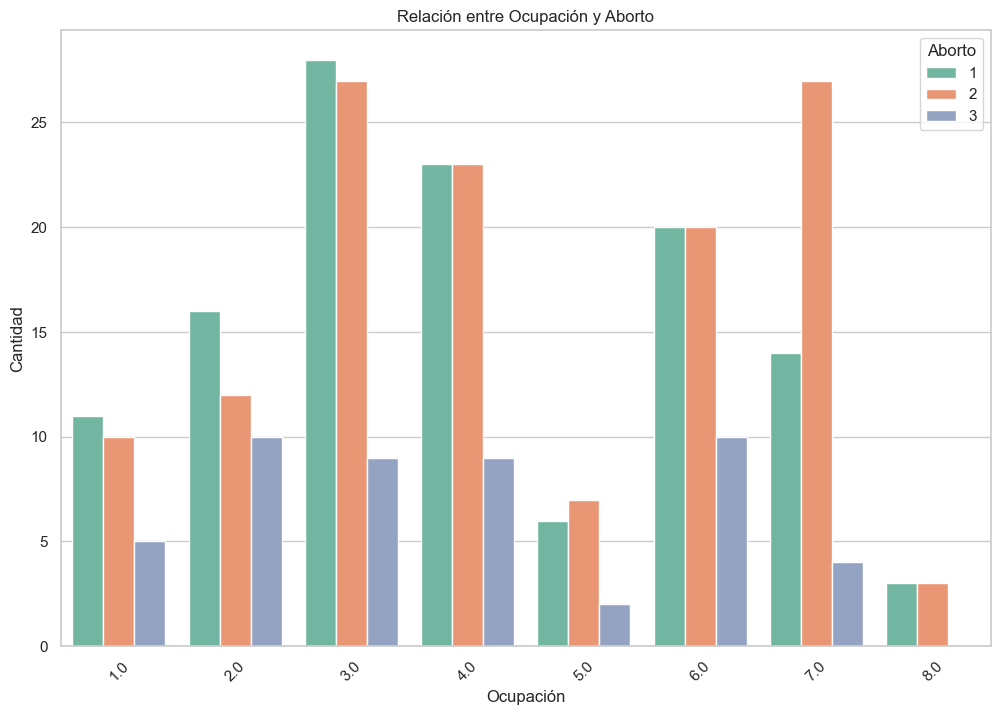

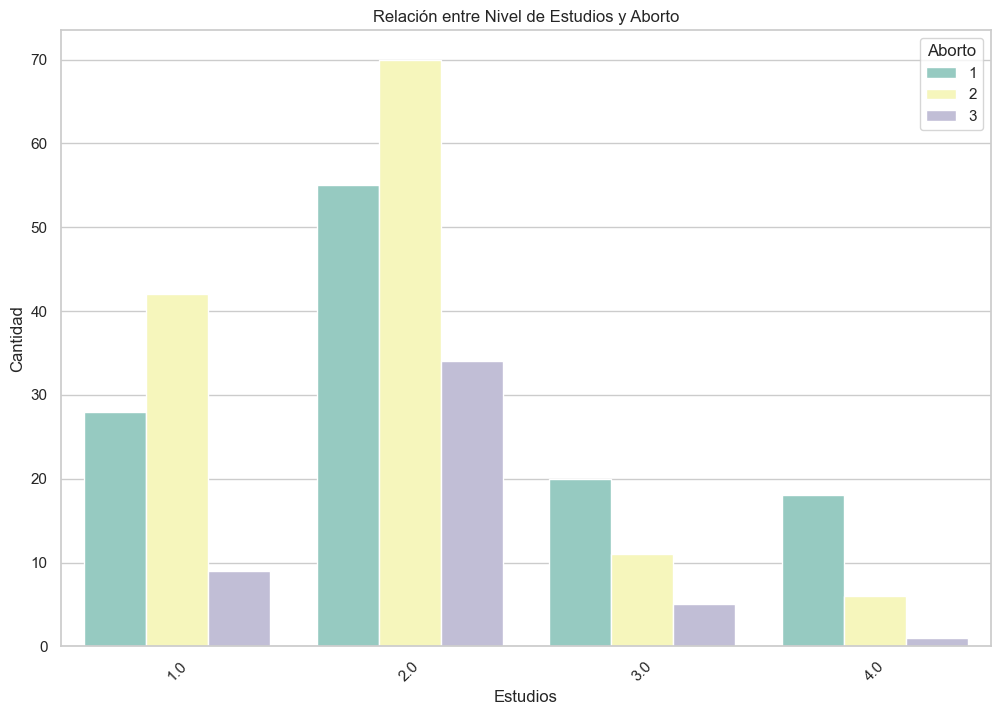

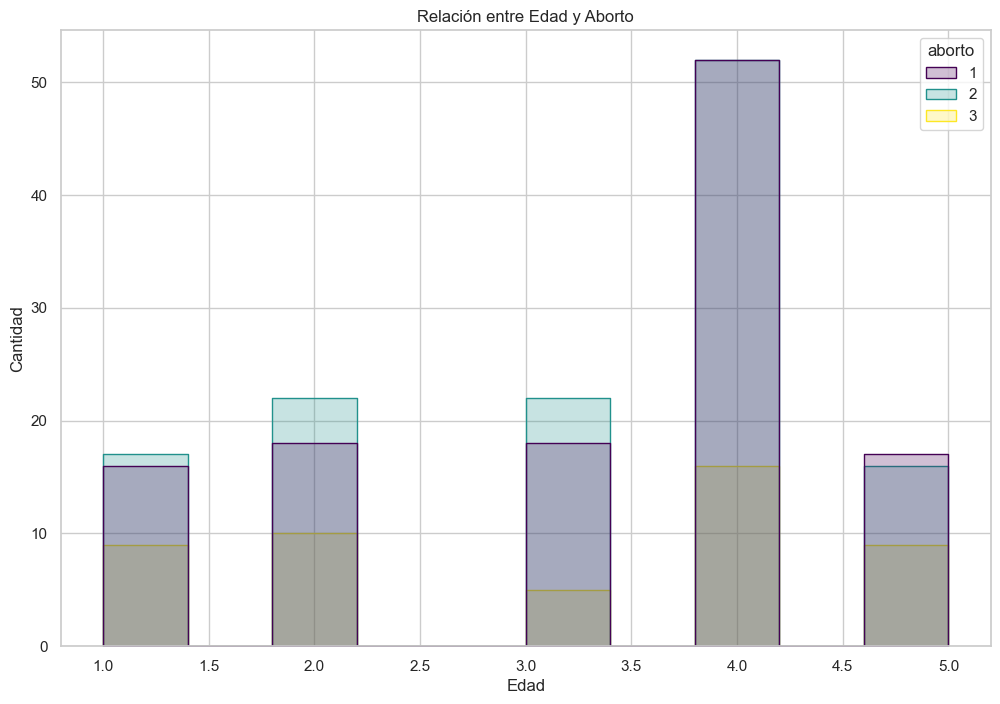

In [7]:
# Crear un gráfico de barras apilado para analizar las relaciones.
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Gráfico de barras apilado para 'SEXO' y 'ABORTO'.
sns.countplot(data=datos, x="sexo", hue="aborto", palette="Set1")
plt.title("Relación entre Sexo y Aborto")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.legend(title="Aborto", loc="upper right")
plt.show()

# Gráfico de barras apilado para 'OCUPACION' y 'ABORTO'.
plt.figure(figsize=(12, 8))
sns.countplot(data=datos, x="ocupacion", hue="aborto", palette="Set2")
plt.title("Relación entre Ocupación y Aborto")
plt.xlabel("Ocupación")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Aborto", loc="upper right")
plt.show()

# Gráfico de barras apilado para 'ESTUDIOS' y 'ABORTO'.
plt.figure(figsize=(12, 8))
sns.countplot(data=datos, x="estudios", hue="aborto", palette="Set3")
plt.title("Relación entre Nivel de Estudios y Aborto")
plt.xlabel("Estudios")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Aborto", loc="upper right")
plt.show()

# Gráfico de barras apilado para 'EDAD' y 'ABORTO'.
plt.figure(figsize=(12, 8))
sns.histplot(data=datos, x="edad", hue="aborto", palette="viridis", element="step", common_norm=False)
plt.title("Relación entre Edad y Aborto")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()


In [8]:
print(datos.groupby('edad').size())

edad
1.0     42
2.0     50
3.0     45
4.0    120
5.0     42
dtype: int64


Filtrado de los datos

In [9]:
datos = datos.drop_duplicates(['sexo','edad','estudios','ocupacion'], keep='last')
datos.count()

sexo         110
edad         110
estudios     110
ocupacion    110
aborto       110
dtype: int64

In [10]:
datos = datos.drop_duplicates(['estudios','ocupacion'], keep='last')
datos.count()

sexo         29
edad         29
estudios     29
ocupacion    29
aborto       29
dtype: int64

Creacion de los datos sinteticos

In [11]:
num_samples = 10  # Número de muestras sintéticas que deseas generar
synthetic_data = []
for _ in range(num_samples):
    sample = datos.sample(n=len(datos), replace=True)  # Remuestrear los datos existentes con reemplazo
    synthetic_data.append(sample)

# Convertir la lista de muestras sintéticas en un nuevo DataFrame
synthetic_df = pd.concat(synthetic_data, ignore_index=True)

In [12]:
synthetic_df

,sexo,edad,estudios,ocupacion,aborto
0,2.0,4.0,3.0,7.0,2
1,2.0,2.0,4.0,3.0,1
2,1.0,2.0,2.0,4.0,1
3,1.0,4.0,1.0,4.0,2
4,2.0,1.0,1.0,7.0,2
...,...,...,...,...,...
285,1.0,1.0,3.0,1.0,2
286,2.0,2.0,4.0,1.0,1
287,2.0,1.0,1.0,1.0,2
288,2.0,1.0,1.0,1.0,2


Graficas de los datos sinteticos

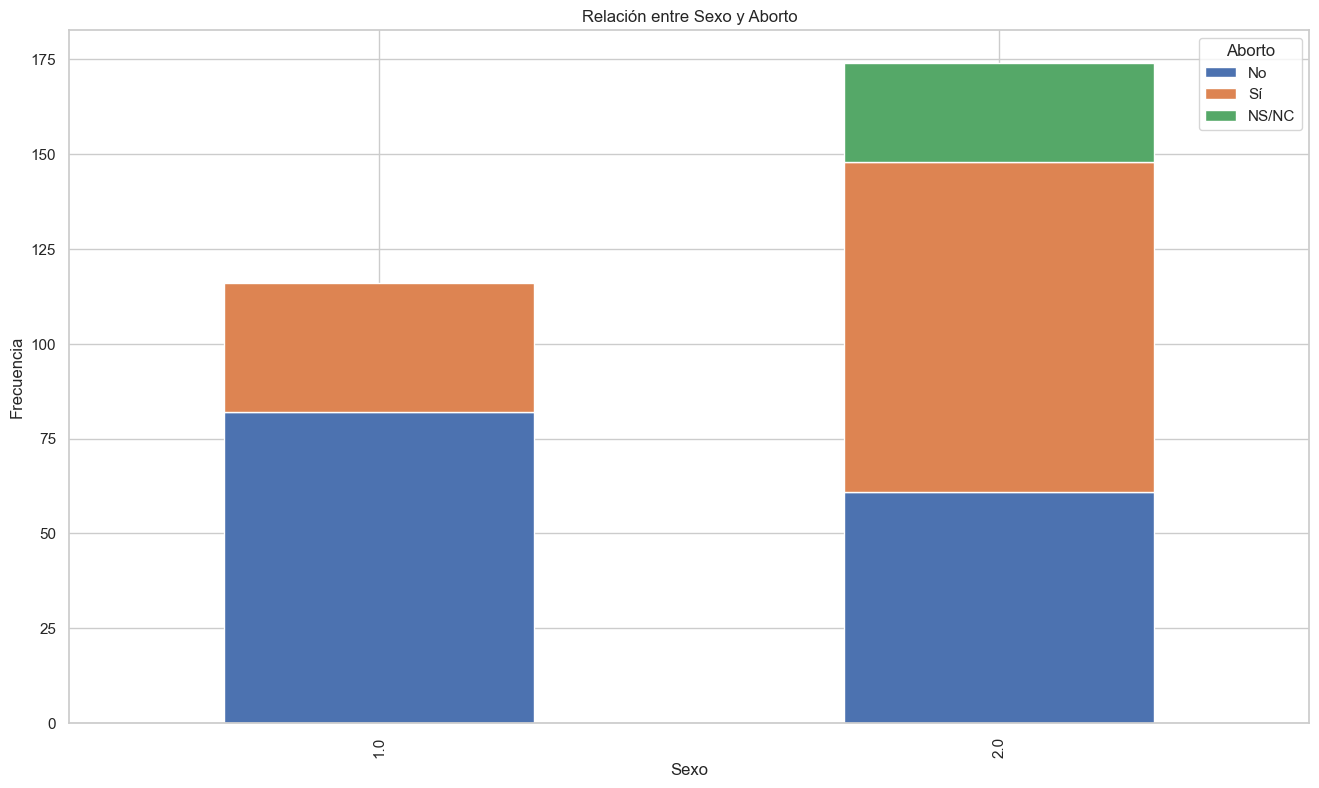

In [13]:
data_grouped = synthetic_df.groupby(['sexo', 'aborto']).size().unstack()

# Graficar el gráfico de barras apilado
data_grouped.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Relación entre Sexo y Aborto')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.legend(title='Aborto', labels=['No', 'Sí', 'NS/NC'])

# Mostrar el gráfico
plt.show()

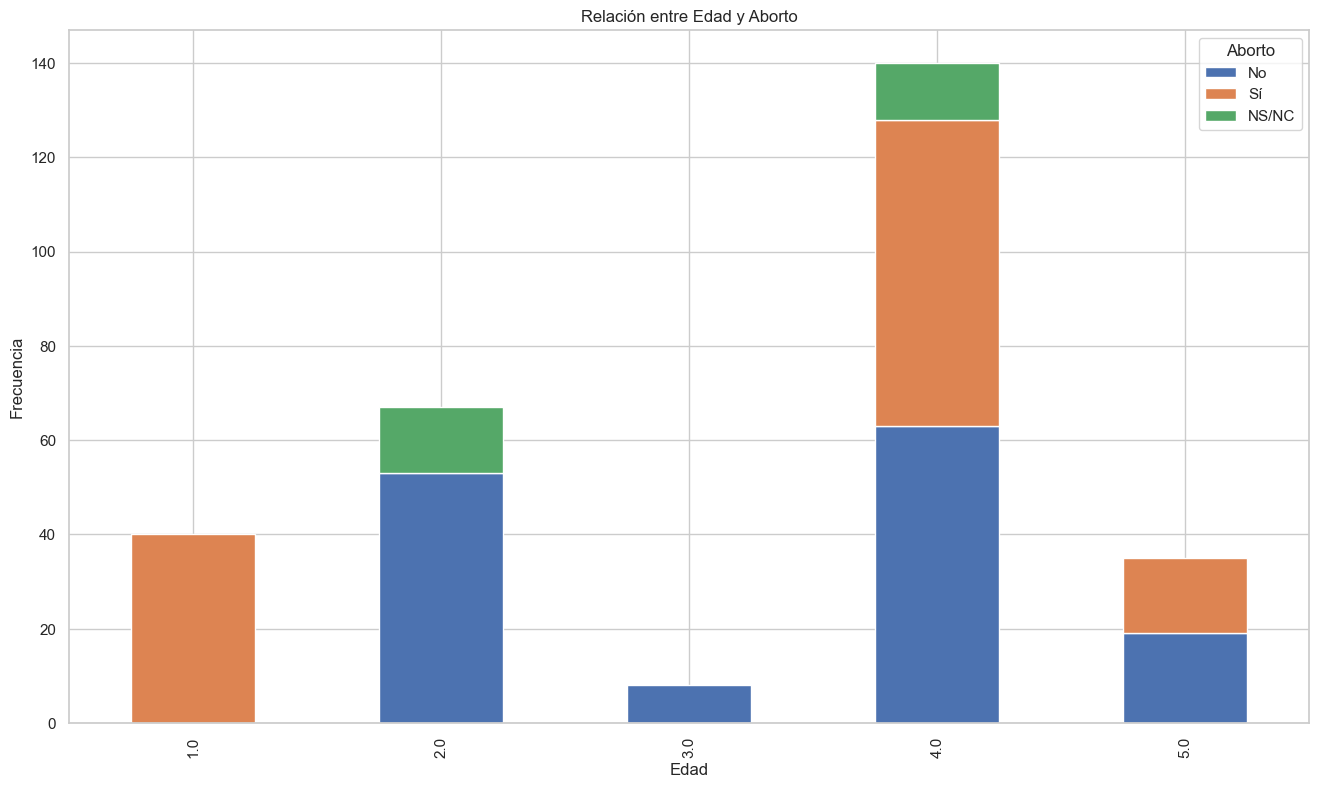

In [14]:
data_grouped = synthetic_df.groupby(['edad', 'aborto']).size().unstack()

# Graficar el gráfico de barras apilado
data_grouped.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Relación entre Edad y Aborto')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Aborto', labels=['No', 'Sí', 'NS/NC'])

# Mostrar el gráfico
plt.show()

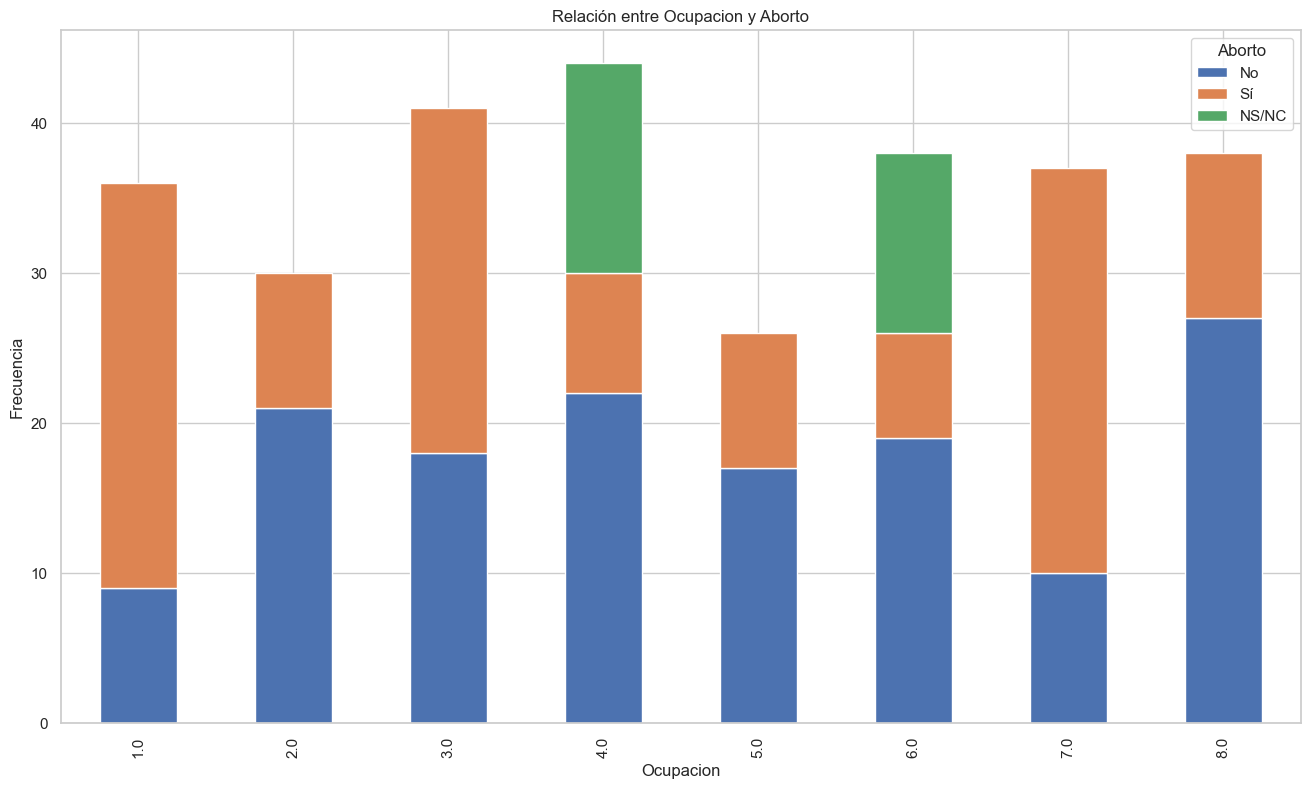

In [15]:
data_grouped = synthetic_df.groupby(['ocupacion', 'aborto']).size().unstack()

# Graficar el gráfico de barras apilado
data_grouped.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Relación entre Ocupacion y Aborto')
plt.xlabel('Ocupacion')
plt.ylabel('Frecuencia')
plt.legend(title='Aborto', labels=['No', 'Sí', 'NS/NC'])

# Mostrar el gráfico
plt.show()

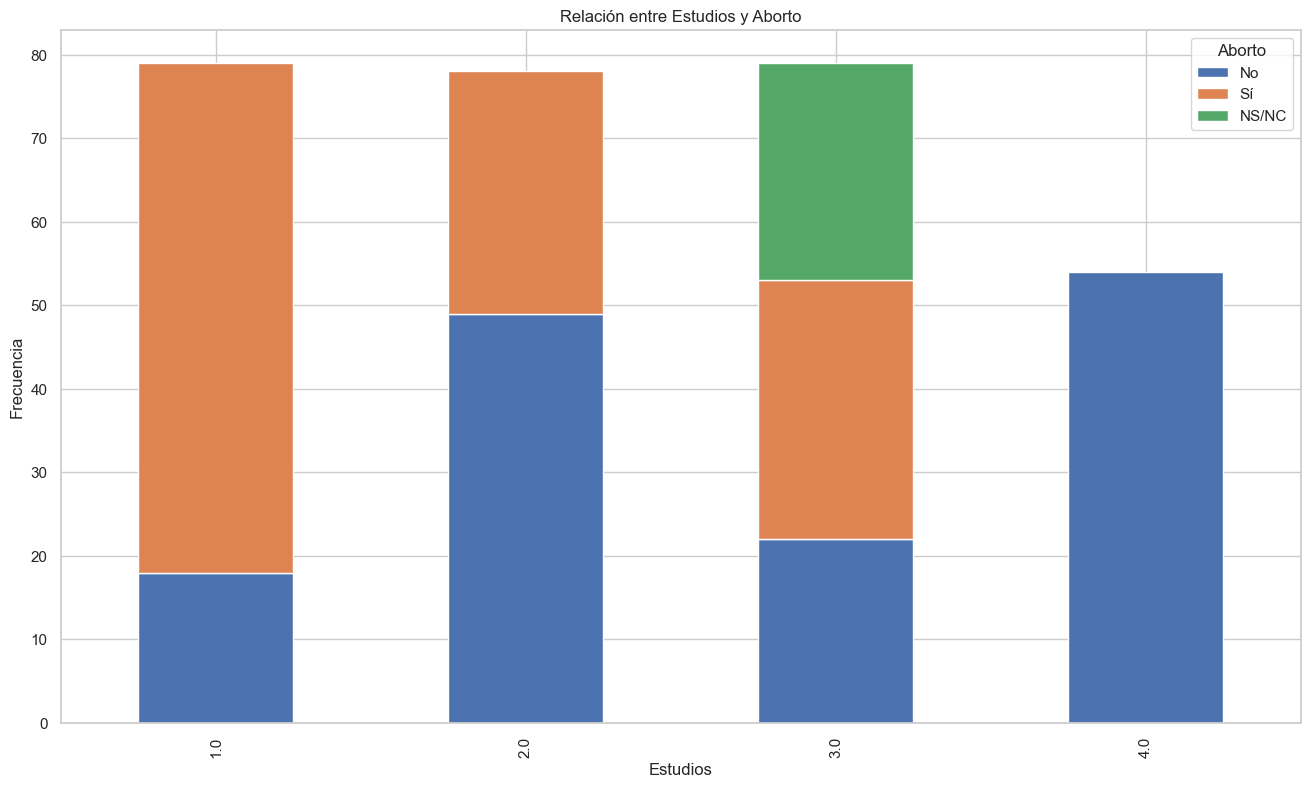

In [16]:
data_grouped = synthetic_df.groupby(['estudios', 'aborto']).size().unstack()

# Graficar el gráfico de barras apilado
data_grouped.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.title('Relación entre Estudios y Aborto')
plt.xlabel('Estudios')
plt.ylabel('Frecuencia')
plt.legend(title='Aborto', labels=['No', 'Sí', 'NS/NC'])

# Mostrar el gráfico
plt.show()

Creacion del Arbol de decision

In [17]:
X = synthetic_df[['sexo','edad','estudios','ocupacion']].values
y = synthetic_df['aborto'].values

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Guardo la escala par poder utilizarla con los modelos de prueba
with open("scaler.pkl", "wb") as outfile:
    pkl.dump(scaler, outfile)

In [18]:
tree_df = DecisionTreeClassifier(max_depth=8)
tree_df.fit(X_train, y_train)
print('Exactitud de los datos de entrenamiento: {:.2f}'
     .format(tree_df.score(X_train, y_train)))
print('Exactitud de los datos de prueba: {:.2f}'
     .format(tree_df.score(X_test, y_test)))

Exactitud de los datos de entrenamiento: 0.97
Exactitud de los datos de prueba: 1.00


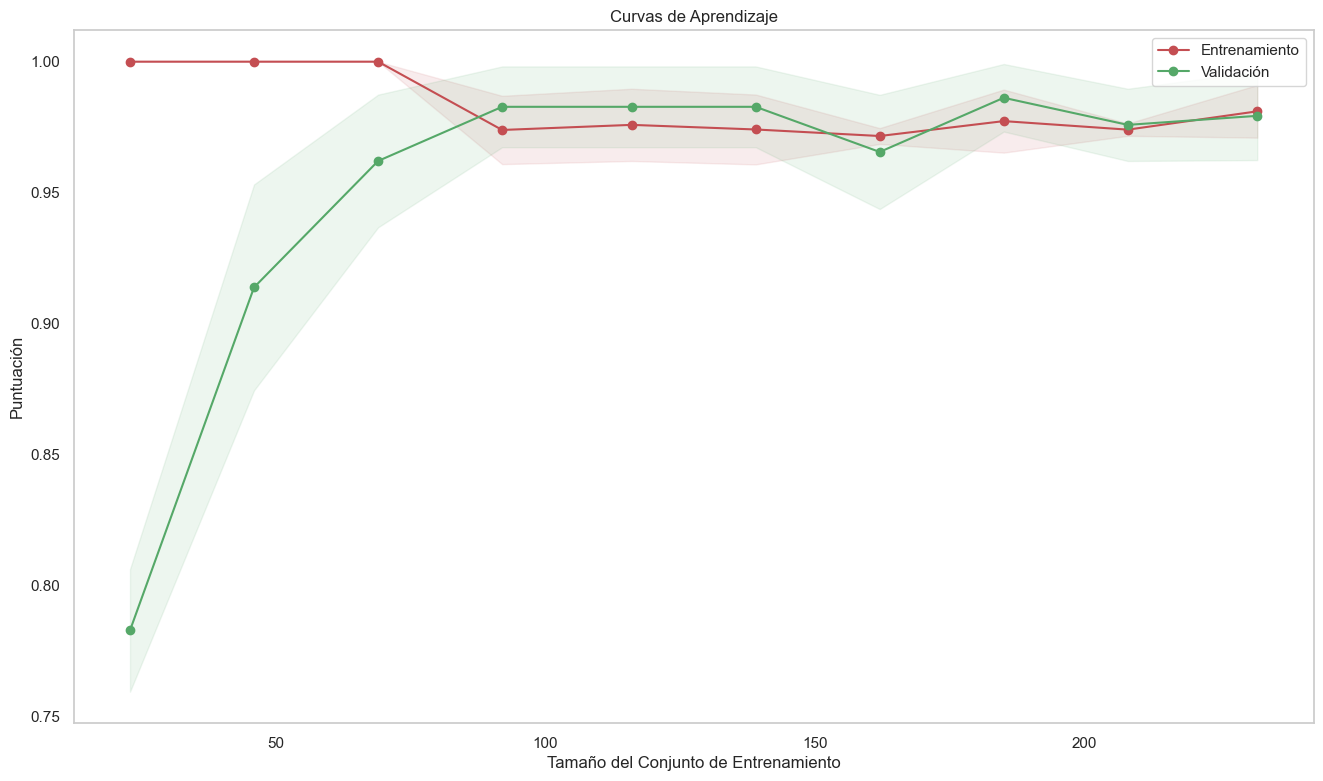

In [19]:
# Crea curvas de aprendizaje utilizando learning_curve
train_sizes, train_scores, test_scores = learning_curve(tree_df, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcula las medias y desviaciones estándar de las puntuaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Dibuja las curvas de aprendizaje
plt.figure()
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")

plt.legend(loc="best")
plt.show()

Grafico Arbo de desiciones

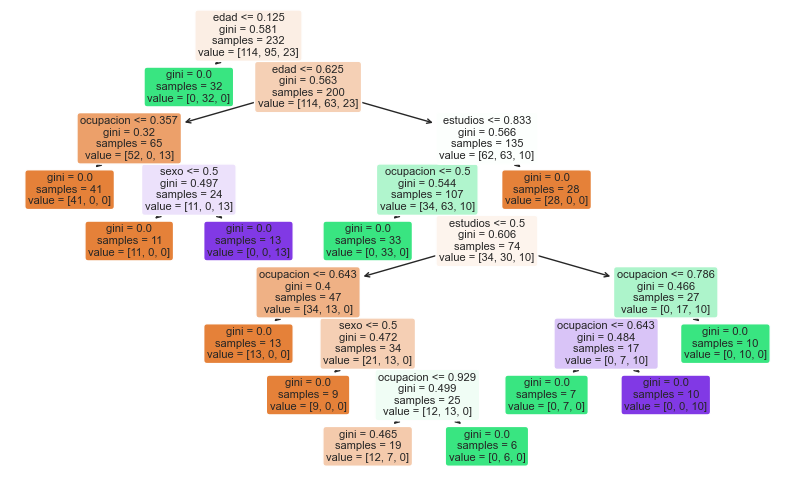

In [20]:
plt.figure(figsize=(10, 6))
plot_tree(tree_df,filled=True, rounded=True, feature_names=['sexo', 'edad', 'estudios', 'ocupacion'])
plt.show()

Metricas de Eficacia del Modelo

In [21]:
pred = tree_df.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[29  0  0]
 [ 0 26  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00         3

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



Prediccion con nuevos datos

In [22]:
nuevos_datos = pd.DataFrame({'sexo': [2, 2, 2,1,1],
                            'edad': [4, 4, 4,3,3],
                            'estudios': [2, 2, 3,3,1],
                            'ocupacion': [3, 3, 6,2,6]})
scaler = MinMaxScaler()

# Antes de escalar los datos de prueba debo cargar las escalas guardadas
with open("scaler.pkl", "rb") as infile:
    scaler = pkl.load(infile)

X_nuevos = scaler.transform(nuevos_datos.values)

# Realizar predicciones con el modelo entrenado
predicciones = tree_df.predict(X_nuevos)

# Las predicciones representan las etiquetas predichas por el modelo (clasificación) o valores predichos (regresión)
print("Predicciones:", predicciones)


Predicciones: [2 2 3 1 1]


Muestra las predicciones

In [23]:
mapeo_opiniones = {1: "A favor del Aborto", 2: "En contra del Aborto", 3: "No Sabe/No Contesta"}

for valor in predicciones:
    opinion = mapeo_opiniones.get(valor, "Valor Desconocido")
    print(f"El caso con prediccion {valor} representa la opinion {opinion}")

El caso con prediccion 2 representa la opinion En contra del Aborto
El caso con prediccion 2 representa la opinion En contra del Aborto
El caso con prediccion 3 representa la opinion No Sabe/No Contesta
El caso con prediccion 1 representa la opinion A favor del Aborto
El caso con prediccion 1 representa la opinion A favor del Aborto
